>[Importing the Dataset.](#scrollTo=9JOfoEWJu24L&uniqifier=1)

>[Preprocessing the data.](#scrollTo=MzhxpYk0GDbJ&uniqifier=1)

>[Creating The Model](#scrollTo=jDS6rtM7-Yw2&uniqifier=1)

>[Creating the Neural Network](#scrollTo=2j_bFFywjWMw&uniqifier=1)

>[Visualing Embeddings](#scrollTo=chRVd63PjFmm&uniqifier=1)



# Importing the Dataset.

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt
from keras.models import load_model, Model
from sklearn.model_selection import train_test_split
from keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import os
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

users_df = pd.read_csv('/content/drive/Othercomputers/My PC/Node/e-learning/ml/datasets/users.csv')
courses_df = pd.read_csv('/content/drive/Othercomputers/My PC/Node/e-learning/ml/datasets/courses.csv')
reviews_df = pd.read_csv('/content/drive/Othercomputers/My PC/Node/e-learning/ml/datasets/reviews.csv')

"\n  from google.colab import files\n  uploaded = files.upload()\n\n  import io\n\n  users = pd.read_csv(io.BytesIO(uploaded['users.csv']))\n  users.shape\n\n  courses = pd.read_csv(io.BytesIO(uploaded['courses.csv']))\n  reviews = pd.read_csv(io.BytesIO(uploaded['reviews.csv']))\n"

In [ ]:
'''
from google.colab import files
uploaded = files.upload()

import io

users = pd.read_csv(io.BytesIO(uploaded['users.csv']))
users.shape

courses = pd.read_csv(io.BytesIO(uploaded['courses.csv']))
reviews = pd.read_csv(io.BytesIO(uploaded['reviews.csv']))
'''

# Preprocessing the data.



In [ ]:
reviews_df.head()
#reviews_df.columns
#reviews_df['user_id']

In [ ]:
user_nos = { '62371761ae894c9bdca29a15' : 1, '624577d0e92ce9961959d77b' : 2, '624578b6bda61dc56d57ea2a' : 3, '6214e3360feccaf7d266ebf4': 4 }
reviews_df['user_id'] = reviews_df['user'].map(user_nos)

#reviews_df['review_id'] = [reviews_df[x] for x in reviews_df['comment']]  
reviews_df['review_id'] = np.arange(len(reviews_df))
reviews_df.head()

In [ ]:
train, test = train_test_split(reviews_df, test_size=0.2, random_state=42)
#train.head()
#test.head()

In [ ]:
n_users = len(reviews_df.user_id.unique())
n_users
n_reviews = len(reviews_df.review_id.unique())
n_reviews

In [ ]:
  user_ids = reviews_df["user_id"].unique().tolist()
  user2user_encoded = { x: i for i, x in enumerate(user_ids)}
  userencoded2user = { i: x for i, x in enumerate(user_ids)}

  reviewIds = reviews_df["review_id"].unique().tolist()
  review2review_encoded = {x: i for i, x in enumerate(reviewIds)}
  review_encoded2review = {i: x for i, x in enumerate(reviewIds)}

  reviews_df["userId"] = reviews_df["user_id"].map(user2user_encoded)
  reviews_df["reviewId"] = reviews_df["review_id"].map(review2review_encoded)

  num_users = len(user2user_encoded)
  num_reviews = len(review_encoded2review)

  reviews_df["rating"] = reviews_df["rating"].values.astype(np.float32)
  rating = reviews_df["rating"]

  min_rating = min(rating)
  max_rating = max(rating)

  print("Number of users: {}, Number of reviews: {}, Min rating: {}, Max rating: {}".format(num_users, num_reviews, min_rating, max_rating))

Number of users: 4, Number of reviews: 20, Min rating: 1.0, Max rating: 5.0


# Creating The Model

In [ ]:
# Creating the dot product model

# creating review embedding path
review_input = Input(shape=[1], name="review-Input")
review_embedding = Embedding(n_reviews + 1, 5, name="review-Embedding")(review_input)
review_vec = Flatten(name="Flatten-reviews")(review_embedding)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users + 1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

# performing dot product and creating model
prod = Dot(name="Dot-Product", axes=1)([review_vec, user_vec])
model = Model([user_input, review_input], prod)
model.compile('adam', 'mean_squared_error')

Epoch 1/5
1/1 [==============================] - 1s 623ms/step - loss: 12.7481
Epoch 2/5
1/1 [==============================] - 0s 6ms/step - loss: 12.7472
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 12.7462
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 12.7453
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 12.7443


Text(0, 0.5, 'Training Error')

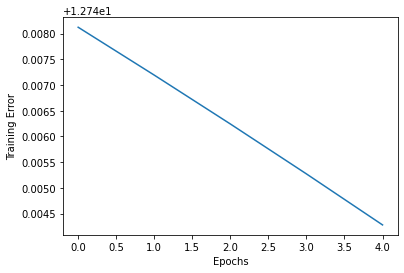

In [ ]:
history = model.fit([train.user_id, train.review_id], train.rating, epochs=5, verbose=1)
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Training Error")

In [ ]:
model.evaluate([test.user_id, test.review_id], test.rating)

1/1 [==============================] - 0s 117ms/step - loss: 12.3774


12.37740421295166

In [ ]:
predictions = model.predict([test.user_id.head(4), test.review_id.head(4)])

[print(predictions[i], test.rating.iloc[i]) for i in range(0,4)]

[0.00230844] 1.5
[-0.00032128] 5.0
[-0.00072665] 4.0
[-0.00150197] 2.5


[None, None, None, None]

# Creating the Neural Network

In [ ]:
# creating review embedding path
review_input = Input(shape=[1], name="review-Input")
review_embedding = Embedding(n_reviews + 1, 5, name="review-Embedding")(review_input)
review_vec = Flatten(name="Flatten-reviews")(review_embedding)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users + 1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

# concatenate features
conc = Concatenate()([review_vec, user_vec])

# add fully-connected-layers
fc1 = Dense(128, activation='relu')(conc)
fc2 = Dense(32, activation='relu')(fc1)
out = Dense(1)(fc2)

# Create model and compile it
model2 = Model([user_input, review_input], out)
model2.compile('adam', 'mean_squared_error')

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 User-Input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 embedding_10 (Embedding)       (None, 1, 15)        165         ['input_7[0][0]']                
                                                                                                  
 embedding_9 (Embedding)        (None, 1, 15)        75          ['User-Input[0][0]']             
                                                                                            

Epoch 1/5
4/4 [==============================] - 121s 40s/step - loss: 13.5860 - val_loss: 8.6446
Epoch 2/5
4/4 [==============================] - 0s 10ms/step - loss: 13.3942 - val_loss: 8.4088
Epoch 3/5
4/4 [==============================] - 0s 10ms/step - loss: 13.0679 - val_loss: 8.1561
Epoch 4/5
4/4 [==============================] - 0s 10ms/step - loss: 12.7489 - val_loss: 7.8894
Epoch 5/5
4/4 [==============================] - 0s 10ms/step - loss: 12.3862 - val_loss: 7.6000


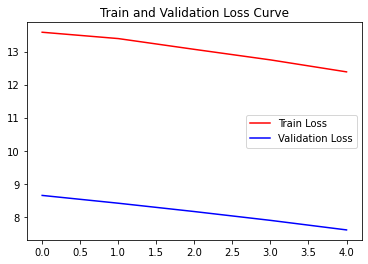

In [ ]:
history = model2.fit([train.user_id, train.review_id], train.rating, epochs=5, verbose=1)
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Training Error")
plt.title("model loss")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [ ]:
model2.evaluate([test.user_id, test.review_id], test.rating)

1/1 [==============================] - 0s 20ms/step - loss: 8.8125


INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


In [ ]:
predictions = model2.predict([test.user_id.head(4), test.review_id.head(4)])

[print(predictions[i], test.rating.iloc[i]) for i in range(0,4)]

[0.06417348] 1.5
[0.07861553] 5.0
[0.08658735] 4.0
[0.06885996] 2.5


[None, None, None, None]

# Visualing Embeddings

In [ ]:
# Extract embeddings
review_em = model.get_layer('review-Embedding')
review_em_weights = review_em.get_weights()[0]

review_em_weights[:5]

NameError: ignored

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(review_em_weights)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1])

NameError: ignored

In [ ]:
review_em_weights = review_em_weights / np.linalg.norm(review_em_weights, axis = 1).reshape((-1, 1))
review_em_weights[0][:10]
np.sum(np.square(review_em_weights[0]))

0.9999999

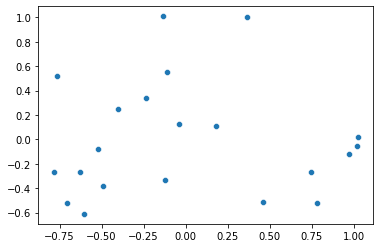

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(review_em_weights)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1])

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tnse_results = tsne.fit_transform(review_em_weights)

[t-SNE] Computing 20 nearest neighbors...
[t-SNE] Indexed 21 samples in 0.000s...
[t-SNE] Computed neighbors for 21 samples in 0.011s...
[t-SNE] Computed conditional probabilities for sample 21 / 21
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.939690
[t-SNE] KL divergence after 300 iterations: 0.446101


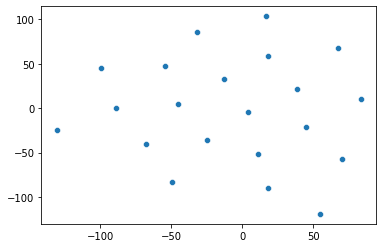

In [ ]:
sns.scatterplot(x=tnse_results[:,0], y=tnse_results[:,1])

# Making Recommendations

In [ ]:
# Creating dataset for making recommendations for the first user
review_data = np.array(list(set(reviews_df.review_id)))
review_data[:5]

array([0, 1, 2, 3, 4])

In [ ]:
user = np.array([1 for i in range(len(review_data))])
user[:5]

NameError: ignored

In [ ]:
predictions = model.predict([user, review_data])
predictions = np.array([a[0] for a in predictions])

recommended_review_ids = (-predictions).argsort()[:5]
recommended_review_ids

array([13,  0,  5, 19,  2])

In [ ]:
# print predicted scores
predictions[recommended_book_ids]

In [ ]:
# Let us get a user and see the top recommendations.
user_id = reviews_df.user_id.sample(1).iloc[0]
courses_studied_by_user = reviews_df[reviews_df.user_id == user_id]

courses_not_studied = reviews_df[~reviews_df["course"].isin(courses_studied_by_user.course.values)]["course"]
courses_not_studied = list(
    set(courses_not_studied).intersection(
        set(course2course_encoded.keys())
        )
    )

courses_not_studied = [[course2course_encoded.get(x)] for x in courses_not_studied]

user_encoder = user2user_encoded.get(user_id)
user_course_array = np.hstack(([[user_encoder]] * len(courses_not_studied), courses_not_studied))

ratings = model.predict(user_course_array).flatten()
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_course_ids = [course_encoded2course.get(courses_not_studied[x][0]) for x in top_ratings_indices]

print("Showing recommendations for user: {}".format(user_id))
print("====" * 9)
print("Courses with high ratings from user")
print("----" * 8)
top_courses_user = (
    courses_studied_by_user.sort_values(by="rating", ascending=False)
    .head(5)
    .course.values
)

course_df_rows = course_df[course_df["course"].isin(top_courses_user)]
for row in course_df_rows.itertuples():
    print(row.title, ":", row.genres)

print("----" * 8)
print("Top 10 course recommendations")
print("----" * 8)
recommended_courses = course_df[course_df["course"].isin(recommended_course_ids)]
for row in recommended_courses.itertuples():
    print(row.title, ":", row.genres)